In [35]:
import pandas as pd
import numpy as np
from datetime import datetime

pd.set_option('display.max_rows', 500)

![CRISP_DM](../reports/figures/CRISP_DM.png)

# Data Preparation
* focus is always to understand the final data structure
* support each step by visual analytics

# John Hopkins GITHUB csv data

In [36]:
data_path = '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw = pd.read_csv(data_path)

In [37]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/10/22,6/11/22,6/12/22,6/13/22,6/14/22,6/15/22,6/16/22,6/17/22,6/18/22,6/19/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,180864,180864,180864,181120,181178,181236,181465,181534,181574,181666
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,276638,276690,276731,276731,276821,276821,276821,277141,277141,277409
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265925,265925,265927,265937,265943,265952,265964,265968,265971,265975
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,43224,43224,43224,43224,43224,43449,43449,43449,43449,43449
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [38]:
pd_raw.columns[4:]

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '6/10/22', '6/11/22', '6/12/22', '6/13/22', '6/14/22', '6/15/22',
       '6/16/22', '6/17/22', '6/18/22', '6/19/22'],
      dtype='object', length=880)

In [39]:
time_idx = pd_raw.columns[4:]

In [40]:
df_plot = pd.DataFrame({'date': time_idx})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [41]:
pd_raw['Country/Region']

0                           Afghanistan
1                               Albania
2                               Algeria
3                               Andorra
4                                Angola
5                            Antarctica
6                   Antigua and Barbuda
7                             Argentina
8                               Armenia
9                             Australia
10                            Australia
11                            Australia
12                            Australia
13                            Australia
14                            Australia
15                            Australia
16                            Australia
17                              Austria
18                           Azerbaijan
19                              Bahamas
20                              Bahrain
21                           Bangladesh
22                             Barbados
23                              Belarus
24                              Belgium


In [42]:
pd_raw[pd_raw['Country/Region'] == 'US'].iloc[:, 4::].sum(axis=0)[0:4]

1/22/20    1
1/23/20    1
1/24/20    2
1/25/20    2
dtype: int64

In [43]:
country_list = [
    'Italy',
    'US',
    'Spain',
    'Germany',
    'Korea, South',
]

In [44]:
for each in country_list:
    df_plot[each] = np.array(
        pd_raw[pd_raw['Country/Region'] == each].iloc[:, 4::].sum(axis=0))

d:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date'>

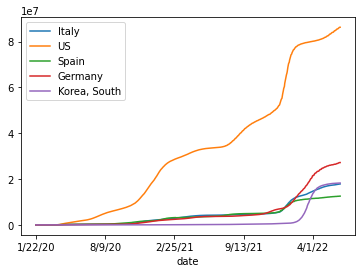

In [45]:
%matplotlib inline
df_plot.set_index('date').plot()

# Data Type Date

In [46]:
df_plot.head()

,date,Italy,US,Spain,Germany,"Korea, South"
0,1/22/20,0,1,0,0,1
1,1/23/20,0,1,0,0,1
2,1/24/20,0,2,0,0,2
3,1/25/20,0,2,0,0,2
4,1/26/20,0,5,0,0,3


In [47]:
datetime.strptime(df_plot.date[0], "%m/%d/%y")

datetime.datetime(2020, 1, 22, 0, 0)

In [48]:
time_idx = [datetime.strptime(each, "%m/%d/%y")
            for each in df_plot.date]  #convert to datetime
time_str = [each.strftime('%Y-%m-%d')
            for each in time_idx]  #convert back to date ISO norm (str)

In [49]:
df_plot['date'] = time_idx
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [50]:
df_plot.head()

,date,Italy,US,Spain,Germany,"Korea, South"
0,2020-01-22,0,1,0,0,1
1,2020-01-23,0,1,0,0,1
2,2020-01-24,0,2,0,0,2
3,2020-01-25,0,2,0,0,2
4,2020-01-26,0,5,0,0,3


In [51]:
df_plot.to_csv('../data/processed/COVID_small_flat_table.csv', sep=';',index=False)

# Relational data model - defining a primary key 

In the relational model of databases, a primary key is a specific choice of a minimal set of atributes (columns) that uniquely specify a tuple (row) in a relation (table) (source: wiki)

A primary key's main features are:

* It must contain a unique value for each row of data 
* It cannot contain null values

In [52]:
data_path = '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw = pd.read_csv(data_path)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/10/22,6/11/22,6/12/22,6/13/22,6/14/22,6/15/22,6/16/22,6/17/22,6/18/22,6/19/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,180864,180864,180864,181120,181178,181236,181465,181534,181574,181666
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,276638,276690,276731,276731,276821,276821,276821,277141,277141,277409
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265925,265925,265927,265937,265943,265952,265964,265968,265971,265975
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,43224,43224,43224,43224,43224,43449,43449,43449,43449,43449
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [53]:
pd_data_base = pd_raw.rename(columns={
    'Country/Region': 'country',
    'Province/State': 'state'
})

In [54]:
pd_data_base = pd_data_base.drop(['Lat', 'Long'], axis=1)
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,6/10/22,6/11/22,6/12/22,6/13/22,6/14/22,6/15/22,6/16/22,6/17/22,6/18/22,6/19/22
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,180864,180864,180864,181120,181178,181236,181465,181534,181574,181666
1,NaN,Albania,0,0,0,0,0,0,0,0,...,276638,276690,276731,276731,276821,276821,276821,277141,277141,277409
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,265925,265925,265927,265937,265943,265952,265964,265968,265971,265975
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,43224,43224,43224,43224,43224,43449,43449,43449,43449,43449
4,NaN,Angola,0,0,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [55]:
pd_relational_model = pd_data_base.set_index(
    ['state',
     'country']).T.stack(level=[0, 1]).reset_index().rename(columns={
         'level_0': 'date',
         0: 'confirmed'
     })
pd_relational_model.head()

,date,state,country,confirmed
0,1/22/20,NaN,Afghanistan,0.0
1,1/22/20,NaN,Albania,0.0
2,1/22/20,NaN,Algeria,0.0
3,1/22/20,NaN,Andorra,0.0
4,1/22/20,NaN,Angola,0.0


In [56]:
pd_relational_model.dtypes

date          object
state         object
country       object
confirmed    float64
dtype: object

In [57]:
pd_relational_model['date'] = pd_relational_model.date.astype('datetime64[ns]')

In [58]:
pd_relational_model.dtypes

date         datetime64[ns]
state                object
country              object
confirmed           float64
dtype: object

In [59]:
pd_relational_model.to_csv('../data/processed/COVID_relational_confirmed.csv', sep=';', index=False)

# Group-by-apply

In [60]:
pd_JH_data = pd.read_csv('../data/processed/COVID_relational_confirmed.csv', sep=';',parse_dates=[0])
pd_JH_data=pd_JH_data.sort_values('date', ascending=True).reset_index(drop=True).copy()
pd_JH_data.head()

,date,state,country,confirmed
0,2020-01-22,NaN,Afghanistan,0.0
1,2020-01-22,Zhejiang,Cyprus,0.0
2,2020-01-22,Zhejiang,Cuba,0.0
3,2020-01-22,Zhejiang,Croatia,0.0
4,2020-01-22,Zhejiang,Cote d'Ivoire,0.0


In [61]:
test_data=pd_JH_data[((pd_JH_data['country']=='US')|
                      (pd_JH_data['country']=='Germany'))&
                     (pd_JH_data['date']>'2020-03-20')]

In [62]:
test_data

,date,state,country,confirmed
28475,2020-03-21,Zhejiang,Germany,16662.0
28603,2020-03-21,Zhejiang,US,26025.0
28702,2020-03-21,NaN,Germany,16662.0
28826,2020-03-21,NaN,US,26025.0
28959,2020-03-22,Zhejiang,Germany,18610.0
...,...,...,...,...
423587,2022-06-18,NaN,US,86230982.0
423716,2022-06-19,Zhejiang,Germany,27211896.0
423840,2022-06-19,Zhejiang,US,86246101.0
423940,2022-06-19,NaN,Germany,27211896.0


In [63]:
test_data.groupby(['country']).agg(np.max)

,date,confirmed
country,,
Germany,2022-06-19,27211896.0
US,2022-06-19,86246101.0


In [64]:
# %load ../src/features/build_features.py
import numpy as np 
from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=True)



def get_rate_via_regression(in_array):
    ''' Use a linear regression to approximate the doubling rate'''
    
    y = np.array(in_array)
    X = np.arange(-1,2).reshape(-1, 1)
    
    assert len(in_array)==3
    reg.fit(X,y)
    intercept=reg.intercept_
    slope=reg.coef_
    
    return intercept/slope


In [65]:
def rolling_reg(df_input,col='confirmed'):
    ''' input has to be a data frame'''
    ''' return is single series (mandatory for group by apply)'''
    days_back=3
    result=df_input[col].rolling(
                window=days_back,
                min_periods=days_back).apply(get_rate_via_regression,raw=False)
    return result

In [66]:
test_data[['state','country','confirmed']].groupby(['state','country']).apply(rolling_reg,'confirmed')

state     country        
Zhejiang  Germany  28475             NaN
                   28959             NaN
                   29440        6.427510
                   29921        5.190573
                   30405        6.129400
                                ...     
          US       421915     623.322849
                   422409     574.732354
                   422880     627.850174
                   423360     997.586657
                   423840    5810.138261
Name: confirmed, Length: 1642, dtype: float64

In [67]:
pd_DR_result=pd_JH_data[['state','country','confirmed']].groupby(['state','country']).apply(rolling_reg,'confirmed').reset_index()

In [68]:
pd_DR_result=pd_DR_result.rename(columns={'confirmed':'doubling_rate',
                             'level_2':'index'})
pd_DR_result.head()

,state,country,index,doubling_rate
0,Alberta,Canada,374,NaN
1,Alberta,Canada,855,NaN
2,Alberta,Canada,1337,NaN
3,Alberta,Canada,1821,NaN
4,Alberta,Canada,2301,NaN


In [69]:
pd_JH_data=pd_JH_data.reset_index()
pd_JH_data.head()

,index,date,state,country,confirmed
0,0,2020-01-22,NaN,Afghanistan,0.0
1,1,2020-01-22,Zhejiang,Cyprus,0.0
2,2,2020-01-22,Zhejiang,Cuba,0.0
3,3,2020-01-22,Zhejiang,Croatia,0.0
4,4,2020-01-22,Zhejiang,Cote d'Ivoire,0.0


In [70]:
pd_result_larg=pd.merge(pd_JH_data,pd_DR_result[['index', 'doubling_rate']],on=['index'],how='left')
pd_result_larg.head()

,index,date,state,country,confirmed,doubling_rate
0,0,2020-01-22,NaN,Afghanistan,0.0,NaN
1,1,2020-01-22,Zhejiang,Cyprus,0.0,NaN
2,2,2020-01-22,Zhejiang,Cuba,0.0,NaN
3,3,2020-01-22,Zhejiang,Croatia,0.0,NaN
4,4,2020-01-22,Zhejiang,Cote d'Ivoire,0.0,NaN


In [71]:
# pd_result_larg[pd_result_larg['country']=='Germany']

# Filtering the data with groupby apply

In [72]:
from scipy import signal

def savgol_filter(df_input,column='confirmed',window=5):
    ''' Savgol Filter which can be used in groupby apply function 
        it ensures that the data structure is kept'''
    window=5, 
    degree=1
    df_result=df_input
    
    filter_in=df_input[column].fillna(0) # attention with the neutral element here
    
    result=signal.savgol_filter(np.array(filter_in),
                           5, # window size used for filtering
                           1)
    df_result[column+'_filtered']=result
    return df_result

In [73]:
pd_filtered_result=pd_JH_data[['state','country','confirmed']].groupby(['state','country']).apply(savgol_filter).reset_index()

In [74]:
pd_result_larg=pd.merge(pd_result_larg,pd_filtered_result[['index','confirmed_filtered']],on=['index'],how='left')
pd_result_larg.head()

,index,date,state,country,confirmed,doubling_rate,confirmed_filtered
0,0,2020-01-22,NaN,Afghanistan,0.0,NaN,NaN
1,1,2020-01-22,Zhejiang,Cyprus,0.0,NaN,0.0
2,2,2020-01-22,Zhejiang,Cuba,0.0,NaN,0.0
3,3,2020-01-22,Zhejiang,Croatia,0.0,NaN,0.0
4,4,2020-01-22,Zhejiang,Cote d'Ivoire,0.0,NaN,0.0


# Filtered doubling rate

In [76]:
pd_filtered_doubling=pd_result_larg[['state','country','confirmed_filtered']].groupby(['state','country']).apply(rolling_reg,'confirmed_filtered').reset_index()

pd_filtered_doubling=pd_filtered_doubling.rename(columns={'confirmed_filtered':'doubling_rate_filtered',
                             'level_2':'index'})

pd_filtered_doubling.head()

,state,country,index,doubling_rate_filtered
0,Alberta,Canada,374,NaN
1,Alberta,Canada,855,NaN
2,Alberta,Canada,1337,NaN
3,Alberta,Canada,1821,NaN
4,Alberta,Canada,2301,NaN


In [78]:
pd_result_larg=pd.merge(pd_result_larg,pd_filtered_doubling[['index','doubling_rate_filtered']],on=['index'],how='left')
pd_result_larg.head()

,index,date,state,country,confirmed,doubling_rate,confirmed_filtered,doubling_rate_filtered
0,0,2020-01-22,NaN,Afghanistan,0.0,NaN,NaN,NaN
1,1,2020-01-22,Zhejiang,Cyprus,0.0,NaN,0.0,NaN
2,2,2020-01-22,Zhejiang,Cuba,0.0,NaN,0.0,NaN
3,3,2020-01-22,Zhejiang,Croatia,0.0,NaN,0.0,NaN
4,4,2020-01-22,Zhejiang,Cote d'Ivoire,0.0,NaN,0.0,NaN


In [79]:
mask=pd_result_larg['confirmed']>100
pd_result_larg['doubling_rate_filtered']=pd_result_larg['doubling_rate_filtered'].where(mask, other=np.NaN)

In [80]:
pd_result_larg.head()

,index,date,state,country,confirmed,doubling_rate,confirmed_filtered,doubling_rate_filtered
0,0,2020-01-22,NaN,Afghanistan,0.0,NaN,NaN,NaN
1,1,2020-01-22,Zhejiang,Cyprus,0.0,NaN,0.0,NaN
2,2,2020-01-22,Zhejiang,Cuba,0.0,NaN,0.0,NaN
3,3,2020-01-22,Zhejiang,Croatia,0.0,NaN,0.0,NaN
4,4,2020-01-22,Zhejiang,Cote d'Ivoire,0.0,NaN,0.0,NaN


In [81]:
pd_result_larg.to_csv('../data/processed/COVID_final_set.csv', sep=';', index=False)